**Final Part B - Plant Clustering and Classification**
> * Section: 1
> * Group Number: S1G4
> * Due date: April 13, 2020
> * Purpose: Machine learning models

**S1G4 NAMES: Alec Gregerson, Connor McGreevy, Jillian Wu, Michael Segaline**

Preprocessing data (10 points)
 Identify and deal with missing data
 Identify and deal outliers, which are those greater than or less than three standard deviations.
 Identify and deal with duplicate data
 To increase readability of visualizations, you may want to add species names to
the dataset.

Explore the dataset (10 points)
 Histograms of each variable
 Correlation chart 

Clustering (20 points)
 Choose proper variables to create clusters. Justify why you choose those
variables.
 The dataset has labels for the three species.
 0: setosa
 1: versicolor
 2: virginica
 Your clustering needs to add another column (cluster) to label the results of
clustering.
 Use the model to predict five cases that are chosen from each original specie.
 Plot the clusters, centroid

Classification (20 points)
 Split the dataset into training and testing. Use the percentage of your choice, but it has to meet the minimum requirement.
 Fit one classification model of your choice (Logistic Regression, Neural Networks, or Decision Tree) with the data
 Validate the model with the testing data
 Confusion matrix, and model metrics. Sklearn doesn’t support ROC curve for more than two classes yet, so no need to draw ROC curve. 

**Part 1 Clustering with the dataset**

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#importing the Iris dataset with pandas
dataset = pd.read_excel("http://barney.gonzaga.edu/~chuang/data/plants.xlsx")
x = dataset.copy()

#preview the dataset
x.head()

,ID,sepal_length,sepal_width,petal_length,petal_width,species
0,1,4.3,2.8,1.9,NaN,0
1,2,4.8,3.4,1.6,0.2,0
2,3,5.0,3.0,1.8,0.4,0
3,4,4.8,3.0,1.4,0.3,0
4,5,5.1,3.8,1.6,0.2,0


In [2]:
#identify na values within columns
x.isna().sum(axis=0)

ID               0
sepal_length     1
sepal_width      5
petal_length    10
petal_width      8
species          0
dtype: int64

In [3]:
#fillna for values with the mean
x = x.fillna(x.mean())

#identify and remove the duplicates
x.drop_duplicates(keep="first", inplace=True)

#preview the dataset
x.head()

,ID,sepal_length,sepal_width,petal_length,petal_width,species
0,1,4.3,2.8,1.9,1.238844,0
1,2,4.8,3.4,1.6,0.200000,0
2,3,5.0,3.0,1.8,0.400000,0
3,4,4.8,3.0,1.4,0.300000,0
4,5,5.1,3.8,1.6,0.200000,0


In [4]:
#remove the irrelavent columns ("ID","species")
x.drop(["ID","species"],axis=1,inplace=True)

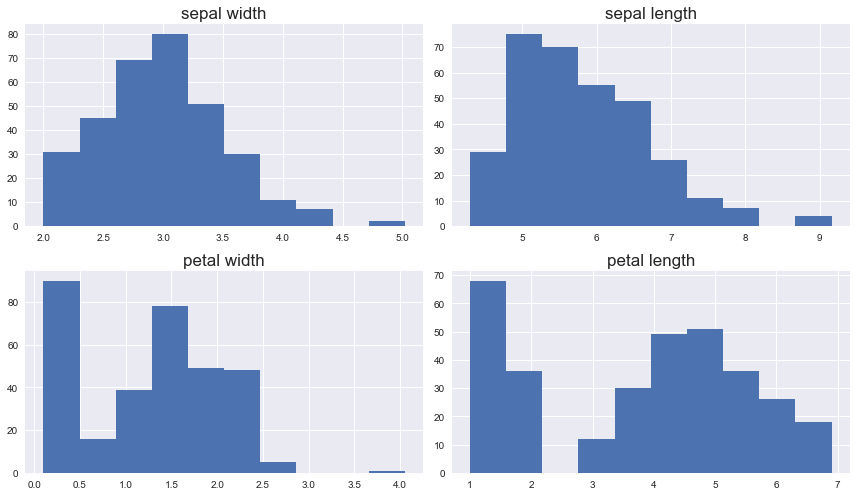

In [5]:
#make histograms for relevant variables to show distribution
plt.figure(figsize=(12,7))
plt.style.use("seaborn")

#plot histogram for the sepal length and width
plt.subplot(2,2,1)
plt.hist(x["sepal_width"])
plt.title("sepal width",fontsize=17)

#plot histogram for the pedal length and width
plt.subplot(2,2,2)
plt.hist(x["sepal_length"])
plt.title("sepal length",fontsize=17)

plt.subplot(2,2,3)
plt.hist(x["petal_width"])
plt.title("petal width",fontsize=17)

plt.subplot(2,2,4)
plt.hist(x["petal_length"])
plt.title("petal length",fontsize=17)

plt.tight_layout()

In [6]:
#remove outliers values with only taking values within three sigmas
from scipy import stats
z = np.abs(stats.zscore(x))
print(z)
print()
print("shape previous to outlier removal ==", x.shape)

#narrow down the z score values less than three
x_scale = x[(z < 3).all(axis=1)]
print("shape after the outlier removal ==", x_scale.shape)

[[1.68425690e+00 4.37546381e-01 1.06234961e+00 2.95534777e-16]
 [1.12502565e+00 7.05970277e-01 1.23186778e+00 1.38267081e+00]
 [9.01333148e-01 5.63741613e-02 1.11885567e+00 1.11647675e+00]
 ...
 [2.00666934e+00 1.19989082e+00 1.70644712e+00 2.95534777e-16]
 [6.64514348e-01 1.34211948e-01 9.71868395e-01 7.46881688e-01]
 [6.56315038e-03 4.37546381e-01 7.45844172e-01 1.54546387e+00]]

shape previous to outlier removal == (326, 4)
shape after the outlier removal == (319, 4)


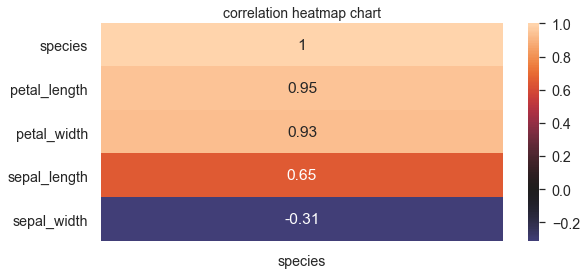

In [7]:
#make correlation heatmap
#clean data didnt have species so iloc to take in columns 
correlation = dataset.corr()[["species"]].sort_values(by="species",ascending=False).iloc[[0,1,3,4,5],:]

plt.figure(figsize=(9,4))
sns.set(font_scale=1.30)
plt.title("correlation heatmap chart",fontsize=14)
sns.heatmap(correlation,annot=True, center=0)

In [10]:
#finding the optimum n clusters for kmeans with "elbow curve" graph
from sklearn.cluster import KMeans
inertia = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, 
                    init="k-means++", 
                    max_iter=300, 
                    n_init=10, 
                    random_state=123)
    kmeans.fit(x_scale)
    inertia.append(kmeans.inertia_)

Text(0, 0.5, 'Squared Sum (Inertia)')

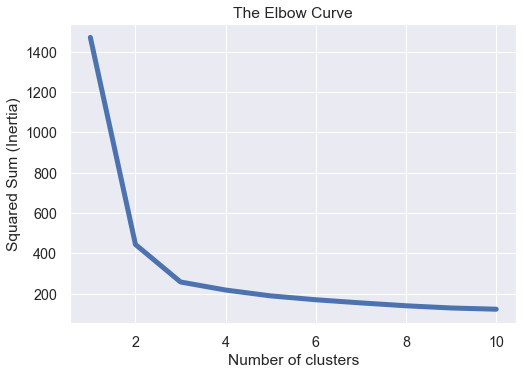

In [11]:
#plot the results with line graph to observe "the elbow"
plt.plot(range(1,11), inertia, linewidth=5)
plt.title("The Elbow Curve")
plt.xlabel("Number of clusters")
plt.ylabel("Squared Sum (Inertia)")

In [12]:
###the graph shows the optimal amount for n clusters is equal to three
#applying kmeans to the dataset and find the kmeans classifier
kmeans = KMeans(n_clusters = 3, init="k-means++", 
                max_iter=300, 
                n_init=10, 
                random_state=123)

y_kmeans = kmeans.fit_predict(x_scale)
print(y_kmeans)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 1 2 2 1 1
 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 2
 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 2 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1]


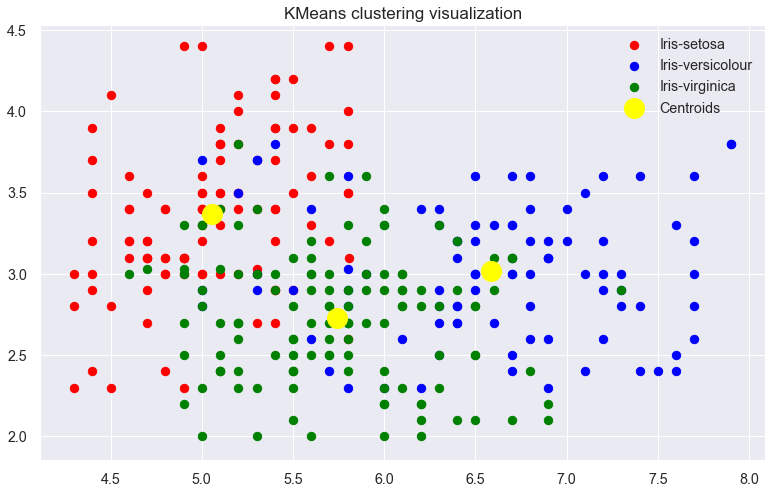

In [13]:
#visualizing the clusters
plt.figure(figsize=(13,8))
plt.scatter(x_scale.iloc[y_kmeans == 0, 0], x_scale.iloc[y_kmeans == 0, 1], 
            s=70, c="red", label = 'Iris-setosa')

plt.scatter(x_scale.iloc[y_kmeans == 1, 0], x_scale.iloc[y_kmeans == 1, 1], 
            s=70, c='blue', label='Iris-versicolour')

plt.scatter(x_scale.iloc[y_kmeans == 2, 0], x_scale.iloc[y_kmeans == 2, 1], 
            s=70, c='green', label='Iris-virginica')

#plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s=400, c='yellow', label="Centroids")

plt.title("KMeans clustering visualization",fontsize=17)
plt.legend()

In [18]:
#predict the values with five random values
r = np.random.randint(317,size=5)

#make print statements to show predictions
prediction = y_kmeans.copy()[r]
print(y_kmeans[r])

for x in prediction:
    if x == 0:
        print("setosa")
    elif x == 1:
        print("versicolor")
    else:
        print("virginica")

[0 2 1 1 2]
setosa
virginica
versicolor
versicolor
virginica


In [22]:
#extract the inertia and labels
inertia = kmeans.inertia_
labels = kmeans.labels_

#concatenate to make new dataset
labels = pd.DataFrame(labels)
columns = pd.DataFrame(x_scale)
df = pd.concat([columns, labels], axis=1)
df = df.rename(columns={0:"species"})
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.3,2.8,1.9,1.238844,0.0
1,4.8,3.4,1.6,0.200000,0.0
2,5.0,3.0,1.8,0.400000,0.0
3,4.8,3.0,1.4,0.300000,0.0
4,5.1,3.8,1.6,0.200000,0.0


In [24]:
#value counts for labels to check classification
df["species"].value_counts()

2.0    124
0.0    103
1.0     92
Name: species, dtype: int64

**Part 2 Classification with the dataset**

In [26]:
y = dataset.copy()
y.head()

,ID,sepal_length,sepal_width,petal_length,petal_width,species
0,1,4.3,2.8,1.9,NaN,0
1,2,4.8,3.4,1.6,0.2,0
2,3,5.0,3.0,1.8,0.4,0
3,4,4.8,3.0,1.4,0.3,0
4,5,5.1,3.8,1.6,0.2,0


In [27]:
#remove the irrelavent columns ("ID")
y.drop(["ID"],axis=1,inplace=True)

In [28]:
#fillna for values with the mean
y = y.fillna(x.mean())

#identify and remove the duplicates
y.drop_duplicates(keep="first", inplace=True)

#preview the dataset
y.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.3,2.8,1.9,2.0,0
1,4.8,3.4,1.6,0.2,0
2,5.0,3.0,1.8,0.4,0
3,4.8,3.0,1.4,0.3,0
4,5.1,3.8,1.6,0.2,0


In [29]:
#show the values for species
y["species"].value_counts()

1    109
2    108
0    107
Name: species, dtype: int64

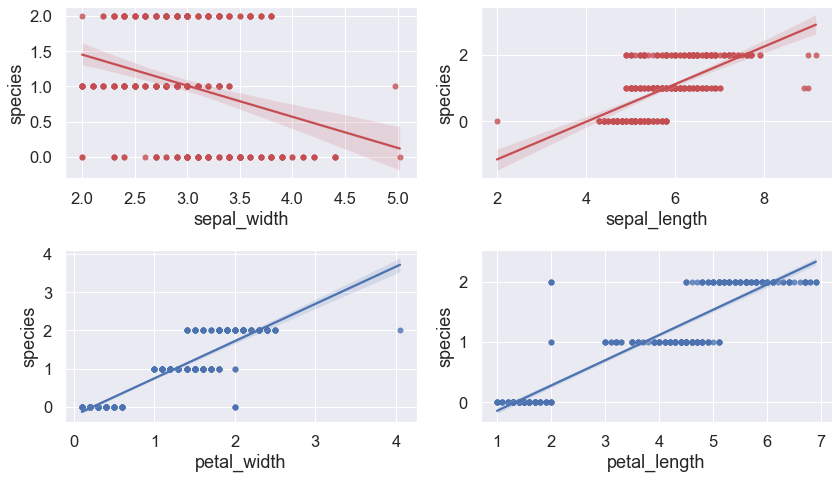

In [30]:
#make histograms for relevant variables to show distribution
plt.figure(figsize=(12,7))
sns.set(font_scale=1.50)

#plot regression line for the sepal length and width
plt.subplot(2,2,1)
sns.regplot(x="sepal_width",y="species",data=y,color="r")

plt.subplot(2,2,2)
sns.regplot(x="sepal_length",y="species",data=y,color="r")

#plot regression line for the pedal length and width
plt.subplot(2,2,3)
sns.regplot(x="petal_width",y="species",data=y,color="b")

plt.subplot(2,2,4)
sns.regplot(x="petal_length",y="species",data=y,color="b")

plt.tight_layout()

In [31]:
#split the data into x and y for train and testing
X = y.drop("species",axis=1)
Y = y["species"]

In [35]:
#make the training and test splits
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.30, 
                                                    random_state=123, 
                                                    stratify=Y)
print("train shape ==", Y_train.shape[0])
print("test shape ==", Y_test.shape[0])

train shape == 226
test shape == 98


In [38]:
from sklearn.linear_model import LogisticRegression

#make logistical regression model
lr = LogisticRegression(C=10, max_iter=500, random_state=123).fit(x_train, Y_train)

#predict the outcome with test set
y_predict = lr.predict(x_test)

In [41]:
#evalaute results wiht score, confusion matrix, and classification report
from sklearn.metrics import confusion_matrix, classification_report

#make confusion matrix
m = confusion_matrix(y_test, y_predict)
print("confusion matrix")
print(pd.DataFrame(m))
print()

#find accuracy score
print("accuracy score")
a = (lr.score(x_test, y_test)*100).round(4)
print(a)
print()

#give classification report
print("classification report")
r = classification_report(y_test, y_predict, output_dict=True)
print(pd.DataFrame(r).transpose().round(4)*100)

confusion matrix
    0   1   2
0  30   2   0
1   0  32   1
2   1   3  29

accuracy score
92.8571

classification report
              precision  recall  f1-score  support
0                 96.77   93.75     95.24  3200.00
1                 86.49   96.97     91.43  3300.00
2                 96.67   87.88     92.06  3300.00
accuracy          92.86   92.86     92.86    92.86
macro avg         93.31   92.87     92.91  9800.00
weighted avg      93.27   92.86     92.89  9800.00


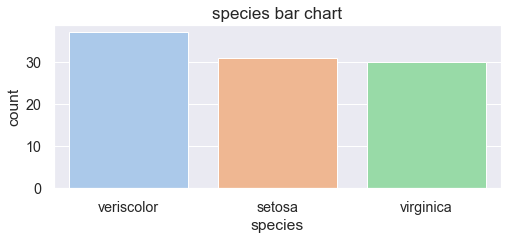

In [44]:
#make y predict series with labels
y_predict = pd.DataFrame(y_predict)
y_predict.replace({0: {0:"setosa", 1:"veriscolor", 2:"virginica"}}, inplace=True)

#make bar chart with prediction values
plt.figure(figsize=(8,3))
sns.set(palette="pastel",font_scale=1.30)
sns.countplot(x=0,data=y_predict)

plt.title("species bar chart",fontsize=17)
plt.xlabel("species");